In [3]:
descriptions = []
with open('description.csv', 'rb') as f:
     descriptions = [l.decode('utf8', 'ignore') for l in f.readlines()]
descriptions = descriptions[1:]
categories = []
with open('category.csv', 'rb') as f:
     categories = [l.decode('utf8', 'ignore') for l in f.readlines()]
sub_categories = []      
with open('subcategories.csv', 'rb') as f:
     sub_categories = [l.decode('utf8', 'ignore') for l in f.readlines()]
sub_categories = sub_categories[1:]
categories = categories[1:]
print('finished')

finished


In [5]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token
corpus = descriptions
corpus_final = []
lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
modified_corpus = [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus]
for item in modified_corpus:
    corpus_final.append(' '.join(item))
vectorizer = TfidfVectorizer(stop_words='english')
description_vector = vectorizer.fit_transform(corpus_final).todense()
print(description_vector)
print(vectorizer.vocabulary_)

[[ 0.          0.          0.         ...,  0.          0.1553171   0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.05499061  0.          0.         ...,  0.          0.          0.        ]
 [ 0.16153968  0.          0.         ...,  0.          0.          0.        ]]
{'rcc': 10803, 'clinicis': 3578, '211': 374, '2090': 368, 'supervisors': 12510, 'asq': 2173, 'luther': 8418, 'attendees': 2249, '2586': 463, 'x2137': 13971, 'astronomy': 2210, 'gien': 6275, 'walking': 13669, 'goodkarma777hn': 6365, 'x17': 13969, 'conexiones': 3866, 'al_s': 1791, 'breakdown': 2873, 'employee': 5262, 'shattuck': 11818, 'primary': 10445, 'kayaking': 7789, 'encuentro': 5290, '804': 1169, 'legos': 8113, 'torres': 12981, 'diameter': 4667, 'sumar': 12476, 'double': 4934, 'reinoso': 11008, 'facilit

In [3]:
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression()  # 使用类，参数全是默认的  
classifier.fit(description_vector[1000:], categories[1000:])  # 训练数据来学习，不需要返回值  
x = classifier.predict(description_vector[:1000])  # 测试数据，分类返回标记 
print('finished')

finished


In [4]:
import pandas as pd
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'isMatch:':match_result,'predict category:':predict_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for logistic regression:' + str(correct_num/len(x)))
df

correct rate for logistic regression:0.86


,correct category:,isMatch:,predict category:
0,Health\r\n,true,Health\r\n
1,Health\r\n,true,Health\r\n
2,Community\r\n,true,Community\r\n
3,Community\r\n,true,Community\r\n
4,Health\r\n,false,Community\r\n
5,Community\r\n,true,Community\r\n
6,Community\r\n,true,Community\r\n
7,Community\r\n,false,Education\r\n
8,Health\r\n,true,Health\r\n
9,Education\r\n,true,Education\r\n


correct rate for logistic regression:0.86


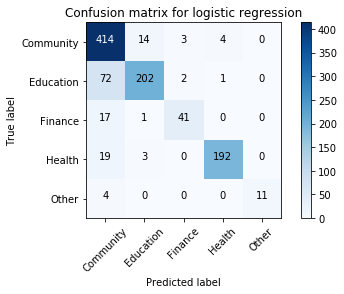

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Community','Education','Finance','Health','Other'],
                      title='Confusion matrix for logistic regression')
print('correct rate for logistic regression:' + str(correct_num/len(x)))
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
rf = KNeighborsClassifier()  
rf.fit(description_vector[1000:], categories[1000:])
x = rf.predict(description_vector[:1000])
print('finished')

finished


In [30]:
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'predict category:':predict_result, 'isMatch:':match_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for kneighbors:' + str(correct_num/len(x)))
df

correct rate for kneighbors:0.84


,correct category:,isMatch:,predict category:
0,Health\r\n,true,Health\r\n
1,Health\r\n,true,Health\r\n
2,Community\r\n,true,Community\r\n
3,Community\r\n,true,Community\r\n
4,Health\r\n,false,Community\r\n
5,Community\r\n,true,Community\r\n
6,Community\r\n,true,Community\r\n
7,Community\r\n,false,Education\r\n
8,Health\r\n,true,Health\r\n
9,Education\r\n,false,Community\r\n


correct rate for KNeighbors:0.84


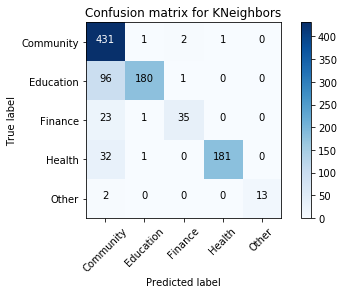

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Community','Education','Finance','Health','Other'],
                      title='Confusion matrix for KNeighbors')
print('correct rate for KNeighbors:' + str(correct_num/len(x)))
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(description_vector[1000:],categories[1000:])
x = clf.predict(description_vector[:1000])
print('finished')

finished


In [33]:
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'predict category:':predict_result, 'isMatch:':match_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for decision tree:' + str(correct_num/len(x)))
print(df)

correct rate for decision tree:0.873
    correct category: isMatch: predict category:
0          Health\r\n     true        Health\r\n
1          Health\r\n     true        Health\r\n
2       Community\r\n     true     Community\r\n
3       Community\r\n     true     Community\r\n
4          Health\r\n     true        Health\r\n
5       Community\r\n     true     Community\r\n
6       Community\r\n     true     Community\r\n
7       Community\r\n     true     Community\r\n
8          Health\r\n     true        Health\r\n
9       Education\r\n     true     Education\r\n
10      Education\r\n    false       Finance\r\n
11         Health\r\n     true        Health\r\n
12      Community\r\n    false        Health\r\n
13      Education\r\n     true     Education\r\n
14      Community\r\n     true     Community\r\n
15      Community\r\n    false     Education\r\n
16      Community\r\n     true     Community\r\n
17      Education\r\n     true     Education\r\n
18      Community\r\n     true  

correct rate for Decision Tree:0.873


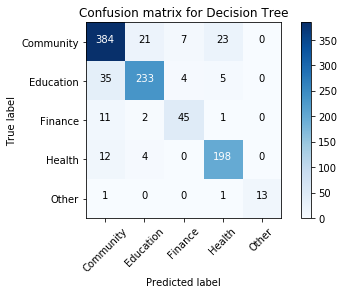

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Community','Education','Finance','Health','Other'],
                      title='Confusion matrix for Decision Tree')
print('correct rate for Decision Tree:' + str(correct_num/len(x)))
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(description_vector[1000:],categories[1000:])
x = clf.predict(description_vector[:1000])
print('finished')

finished


In [36]:
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'predict category:':predict_result, 'isMatch:':match_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for random forest:' + str(correct_num/len(x)))
print(df)

correct rate for random forest:0.89
    correct category: isMatch: predict category:
0          Health\r\n     true        Health\r\n
1          Health\r\n     true        Health\r\n
2       Community\r\n     true     Community\r\n
3       Community\r\n     true     Community\r\n
4          Health\r\n     true        Health\r\n
5       Community\r\n     true     Community\r\n
6       Community\r\n     true     Community\r\n
7       Community\r\n     true     Community\r\n
8          Health\r\n     true        Health\r\n
9       Education\r\n     true     Education\r\n
10      Education\r\n    false     Community\r\n
11         Health\r\n     true        Health\r\n
12      Community\r\n     true     Community\r\n
13      Education\r\n     true     Education\r\n
14      Community\r\n     true     Community\r\n
15      Community\r\n     true     Community\r\n
16      Community\r\n     true     Community\r\n
17      Education\r\n     true     Education\r\n
18      Community\r\n     true   

correct rate for Random Forest:0.89


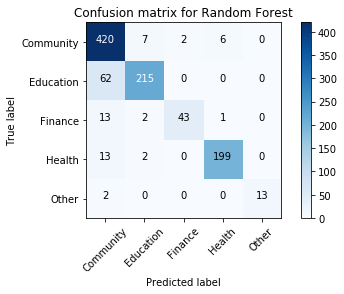

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Community','Education','Finance','Health','Other'],
                      title='Confusion matrix for Random Forest')
print('correct rate for Random Forest:' + str(correct_num/len(x)))
plt.show()

In [38]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(description_vector[1000:],categories[1000:])
x = clf.predict(description_vector[:1000])
print('finished')

finished


In [39]:
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'predict category:':predict_result, 'isMatch:':match_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for random forest:' + str(correct_num/len(x)))
df

correct rate for random forest:0.893


,correct category:,isMatch:,predict category:
0,Health\r\n,true,Health\r\n
1,Health\r\n,true,Health\r\n
2,Community\r\n,true,Community\r\n
3,Community\r\n,true,Community\r\n
4,Health\r\n,true,Health\r\n
5,Community\r\n,true,Community\r\n
6,Community\r\n,true,Community\r\n
7,Community\r\n,false,Education\r\n
8,Health\r\n,true,Health\r\n
9,Education\r\n,true,Education\r\n


correct rate for SVM:0.893


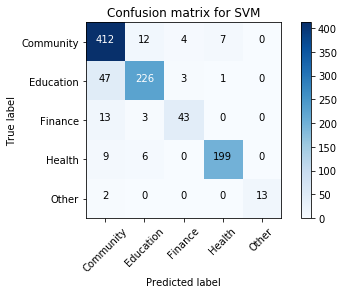

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Community','Education','Finance','Health','Other'],
                      title='Confusion matrix for SVM')
print('correct rate for SVM:' + str(correct_num/len(x)))
plt.show()

In [6]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(description_vector[1000:],sub_categories[1000:])
x = clf.predict(description_vector[:1000])
print('finished')

finished


In [7]:
import pandas as pd
correct_num = 0
origin_result = []
predict_result = []
match_result = []
for index,item in enumerate(x):
    if x[index] == categories[index]:
        correct_num += 1
        match_result.append('true')
    else:
        match_result.append('false')
    origin_result.append(categories[index])
    predict_result.append(item)
dataframe = {'correct category:':origin_result, 'predict category:':predict_result, 'isMatch:':match_result}
df = pd.DataFrame(data=dataframe)
print('correct rate for svm:' + str(correct_num/len(x)))
df

correct rate for svm:0.067


,correct category:,isMatch:,predict category:
0,Health\r\n,false,Health (Mental & Physical)\r\n
1,Health\r\n,false,Health (Mental & Physical)\r\n
2,Community\r\n,false,Workshop/Info Session\r\n
3,Community\r\n,false,Political Activity\r\n
4,Health\r\n,true,Health\r\n
5,Community\r\n,false,Political Activity\r\n
6,Community\r\n,false,Workshop/Info Session\r\n
7,Community\r\n,false,Workshop/Info Session\r\n
8,Health\r\n,false,Health (Mental & Physical)\r\n
9,Education\r\n,true,Education\r\n


In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(origin_result, predict_result)
np.set_printoptions(precision=2)


plt.figure()
sub_category_set = set(sub_categories)
classes_s = []
for item in sub_category_set:
    classes_s.append(item)
plot_confusion_matrix(cnf_matrix, classes=classes_s,
                      title='Confusion matrix for SVM')
print('correct rate for SVM:' + str(correct_num/len(x)))
plt.show()

correct rate for SVM:0.067
